如果你是编程的初学者，你需要看这篇文章；如果你从其他语言转移到 R，请务必阅读本文第一节（序），以及最后一节：代码风格指导。许多实用内容可以在本系列文章的“数据结构”与“数据管理”中找到。

<!-- more -->

本系列文章可以作为一份快速的 R 上手指南，或者一份在线速查手册。内容参考了大量其他文字。操作系统基于 Windows。

## 序：给其他程序员

R 语言有些内容对经验丰富的程序员来说颇为奇怪，具体包括：

- **对象名称中可以包含句点。**有的程序语言中这个符号代表了“成员”的含义，而 R 中的句点无实意；相反，美元符号在 R 中近似于“成员”。
- **没有多行注释。**你只能在每行前加上“#”符号，或者用 if(FALSE){...} 将其括起。
- **下标从 1 开始。**初学者的福音，程序员的噩梦。

## 入门

### 安装 R 与 RStudio

前往 [CRAN 站点](https://cran.r-project.org/)可以找到 R 的相关下载。安装好之后，建议安装 RStudio 作为编辑环境，这应该是主流的选择。

- 如果你还使用 Github，那么我向你强烈推荐 Jupyter Notebook，它生成的 ipynb 文件在 Github 上可以直接在线以**可读性极佳**的形式预览——尤其是你需要把图片和绘图代码放在一起的时候。效果可以参考我的[这个页面](https://github.com/wklchris/wklchris.github.io/blob/master/ipynb/Data-science-support-blog-skills.ipynb)。
- 如果你不仅使用 Github，还使用 Python，那你**千万一定**要用 Jupyter Notebook！我的 Github 中[这个页面的 Readme 文件](https://github.com/wklchris/Note-by-Jupyter)大体介绍了怎样安装 Jupyter Notebook 和添加 R 内核支持。
- 如果你只是想要在本地的 RStudio 上把图片和绘图代码一起展示，不想理会什么 Jupyter ，那就搜索“Rmarkdown”吧。

建议先配置好你的 R 工作环境，再继续向下阅读。同时，建议你将 R 放置在 PATH 环境变量中。

### 简单的例子

R 的常见身份是统计或数据语言，那就画个散点图当例子吧。

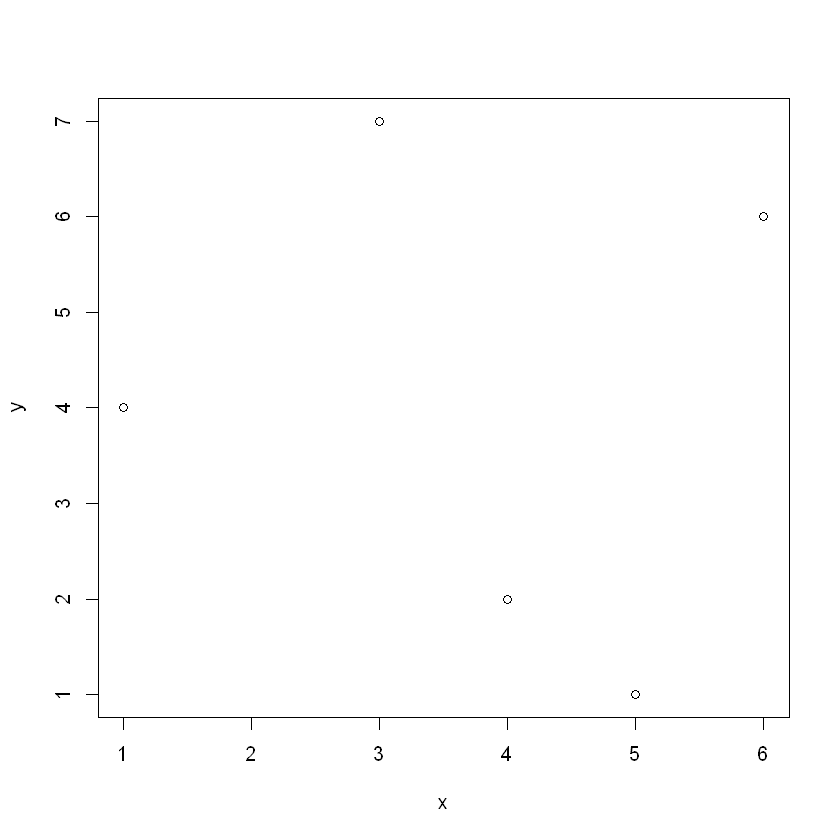

In [1]:
x <- c(1, 3, 4, 5, 6)
y <- c(4, 7, 2, 1, 6)
plot(x, y)

### 查找帮助

以下几个命令是常用的帮助命令：

```r
help.start()  # 帮助首页
help("function")  # 查看函数 function 的帮助
?function  # 同上
```

### 工作目录

工作目录不是一个陌生的概念，简单来说就是在哪个文件夹下进行文件操作（包括部分临时文件、读取设置、读写数据等）。但是指定工作目录似乎没有 Python 那样方便，在不同设备上运行时很是头痛。

```r
getcwd()  # 显示当前工作目录
setcwd(*where)  # 设置工作目录到某路径
```

### 输入/输出选项

R 可以在当前环境有运行已有的 R 文件，算一种广义输入。调用函数是 source(*filename*)。

R 的文字、图片输出可以分离，分别使用 sink(*filename*) 和 以下图片输出函数：bmp (.bmp), pdf (.pdf), jpeg (.jpg), png (.png), postscript (.ps), svg (.svg), win.metafile (.wmf)。例如：

```r
# 直接输出到屏幕
source("script1.R")
# 文本追加模式 append ，输出到文件的同时输出到屏幕 split
sink("myoutput", append=TRUE, split=TRUE) 
pdf("mygraphs.pdf")
source("script2.R")
# 不保存输出
sink()
dev.off()
source("script3.R")
```

### 包的安装与使用

例如 install.packages("gclus")，其中双引号是不能少的。

如果包已经安装，使用 library(gclus) 这样的形式在文件中加载包。

## 基本语法

R 的赋值可以使用 `=` 或者 `<-`（但建议一律使用 `<-`，详见本文末节），例如：

In [2]:
tmp = 3
print(tmp)

[1] 3


### 大小写敏感

In [3]:
tmp = "ThisisText"
tmp2 = "thisisText"
print(tmp == tmp2)

[1] FALSE


### 逻辑判断

In [4]:
print(c(1 < 2, 3 > 2, 2 == 2, 3 != 2))

[1] TRUE TRUE TRUE TRUE


### 工作空间

在 R 中，路径中需要使用正斜杠(/)。如果你使用 Windows 系统，也可以使用双反斜杠。

In [5]:
# getwd()  # 获取当前工作空间路径
# setwd(path_string)  # 设置工作空间

在 Rstudio 中，右下角的文件浏览器板块显示的位置即代表了你当前的工作空间。通过该板块右上角的“...”符号可以浏览并定位到你想要的文件夹。

## 风格指导

搜索“来自 Google 的 R 语言编码风格指南”可以找到中文版。这里我根据英文原版[Google's R Style Guide](https://google.github.io/styleguide/Rguide.xml)，总结如下：

### 基本要旨

- 文件扩展名名：用**大写字母 R**。
- 命名规则：在任何时候都**不要使用**短横或者下划线。具体的详细格式应当有：
    - 变量名：全小写，并使用句点分隔（avg.clicks）；或者不用句点而改用大写字母分隔（avgClicks）。
    - 函数名：首字母大写，使用大写字母分隔（CalculateAvgClicks ）。不使用句点。
    - 常量：命名类似函数，但是以小写字母 k 开头（kConstantName）。
- 行宽：最多80字符
- 缩进：**两个空格**而不是制表符。
- 空格：
    - 在二元操作符（包括关系符和运算符，如 <- = + 等）的两侧加空格，除非它在函数调用语句中。
    - 逗号的右侧空格。
    - 左圆括号的左侧空格，除非它在函数调用语句中。
    - 单语句断行时，对齐赋值符号而添加额外空格是允许的。
- 花括号：左花括号不单独一行，右花括号总是单独一行。如果有连续的花括号，这样书写：
    ```{r}
    if (condition) {
      one or more lines
    } else {
      one or more lines
    }
    ```
- 赋值符：**使用 <- 而不使用 =**。
- 分号：你用分号干啥？

### 代码布局

- 按以下顺序布局：
    1. 注释：版权声明
    2. 注释：作者注
    3. 注释：文件描述，包括功能、输入、输出
    4. source() 与 library() 语句
    5. 函数定义
    6. 执行语句
- 注释规则：
    - 行间注释：注释符“#”顶格，之后空一格，书写注释
    - 行尾注释：仿上，并在注释符与语句尾之间**空两格**
- TODO风格：全篇TODO的风格请统一。
- 函数规则：
    - 函数定义时，必选参数在前，可选参数在后。
    - 如果要折行，请在逗号后进行，而不是参数赋值的等号后。
- 函数文档：在函数定义行结束后，请跟进一个函数文档，包括：
    1. 描述块：一句话总结函数的作用
    2. 参数块：以“Args: ”开头，每个参数一行，阐明各参数（包括数据类型）。
    3. 返回值块：以“Returns: ”开头，阐明返回值。
    4. 各块之间留一个空行。文档效果**以不阅读代码即能使用函数为准**。
    
函数声明的例子：

```{r}
CalculateSampleCovariance <- function(x, y, verbose = TRUE) {
  # Computes the sample covariance between two vectors.
  #
  # Args:
  #   x: One of two vectors whose sample covariance is to be calculated.
  #   y: The other vector. x and y must have the same length, greater than one,
  #      with no missing values.
  #   verbose: If TRUE, prints sample covariance; if not, not. Default is TRUE.
  #
  # Returns:
  #   The sample covariance between x and y.
  n <- length(x)
  # Error handling
  if (n <= 1 || n != length(y)) {
    stop("Arguments x and y have different lengths: ",
         length(x), " and ", length(y), ".")
  }
  if (TRUE %in% is.na(x) || TRUE %in% is.na(y)) {
    stop(" Arguments x and y must not have missing values.")
  }
  covariance <- var(x, y)
  if (verbose)
    cat("Covariance = ", round(covariance, 4), ".\n", sep = "")
  return(covariance)
}
```

### R 语言细节

- 不要用 attach() 函数
- 用 stop() 抛出函数错误
- 尽可能地避免 S4 对象与方法；不要混用 S3 与 S4.
    
###  结语

勿忘常识，**统一风格**。

如果你在维护代码，请谨记这一点。比如原代码的注释用星号框包围，那你也应当遵守。让人们专注于代码*表达了什么*，而不是浪费时间在*代码怎么表达的*。如果你添加的代码与原风格差别明显，这会破坏读者的阅读节奏与体验。

—— 本系列文章的主要参考资料：

*Kabacoff R I.* R 语言实战（第二版）[M]. 人民邮电出版社, 2016.